# Q1. Exploratory Data Analysis (EDA)

In [496]:
# https://medium.com/@kinnesp2000/exploratory-data-analysis-technique-625106f11e7b
# http://datasciencedj.blogspot.com/2016/08/exploratory-data-analysis-eda-movie-lens-python.html
# https://github.com/Lal4Tech/movielens-data-exploration/blob/master/src/main/code/exploratory_analysis.ipynb

In [497]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [498]:
# import jovian
# import bar_chart_race as bcr
# import pycountry
import operator
from collections import Counter
import warnings

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# https://jovian.ai/surendranjagadeesh/movielens-eda

In [499]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [500]:
movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")
links = pd.read_csv("links.csv")
tags = pd.read_csv("tags.csv")

# ratings = pd.read_csv("ratings.csv", sep = "::", 
#                       header=None, names= ['UserID', 'MovieID', 'Rating', 'Timestamp' ])

# links = pd.read_csv("links.csv", sep = "::", 
#                     header=None, names= ['MovieID', 'ImdbID', 'TmdbID' ])

# tags = pd.read_csv("tags.csv", sep = "::", 
#                    header=None, names= ['UserID', 'MovieID', 'Tag', 'Timestamp' ])

## Movie 

In [501]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [502]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [503]:
movies.shape

(9742, 3)

In [504]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [505]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [506]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


## Ratings

In [507]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [508]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [509]:
ratings.shape

(100836, 4)

In [510]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [511]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [512]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


## Further Analysis

### Visualize the User Rating of the Movie with ID=1

In [513]:
ts_data= ratings[ratings.movieId==1]
ts_data.head(10)
# prints 10 entries with movie id=1

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
1772,18,1,3.5,1455209816
2274,19,1,4.0,965705637
3219,21,1,3.5,1407618878
4059,27,1,3.0,962685262
4879,31,1,5.0,850466616


#### Count of each rating

In [514]:
ts_data.groupby('rating').size()

rating
0.5     1
1.5     1
2.0     6
2.5     8
3.0    34
3.5    18
4.0    82
4.5    18
5.0    47
dtype: int64

In [515]:
group_ts= ts_data.groupby('rating')
group_ts.agg({'rating':'mean'})

,rating
rating,
0.5,0.5
1.5,1.5
2.0,2.0
2.5,2.5
3.0,3.0
3.5,3.5
4.0,4.0
4.5,4.5
5.0,5.0


(array([ 1.,  0.,  1.,  6.,  8., 34., 18., 82., 18., 47.]),
 array([0.5 , 0.95, 1.4 , 1.85, 2.3 , 2.75, 3.2 , 3.65, 4.1 , 4.55, 5.  ]),
 <BarContainer object of 10 artists>)

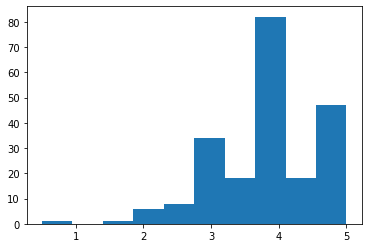

In [516]:
plt.hist(x=ts_data['rating'])
plt.show()

### Counting NaN in columns of movies

In [517]:
# s = pd.DataFrame(movies)
# s.isna().sum()
# movies.isnull().sum()
print("moviesId: ",movies['movieId'].isnull().sum())

moviesId:  0


In [518]:
print("title: ",movies['title'].isnull().sum())

title:  0


In [519]:
print("genres: ",movies['genres'].isnull().sum())

genres:  0


### Counting NaN in columns of ratings

In [520]:
print("userId: ",ratings['userId'].isnull().sum())

userId:  0


In [521]:
print("moviesId: ",ratings['movieId'].isnull().sum())

moviesId:  0


In [522]:
print("rating: ",ratings['rating'].isnull().sum())

rating:  0


In [523]:
print("timestamp: ",ratings['timestamp'].isnull().sum())

timestamp:  0


### Counting NaN in columns of tags

In [524]:
print("movieId: ",tags['movieId'].isnull().sum())

movieId:  0


In [525]:
print("userId: ",tags['userId'].isnull().sum())

userId:  0


In [526]:
print("tag: ",tags['tag'].isnull().sum())

tag:  0


In [527]:
print("timestamp: ",tags['timestamp'].isnull().sum())

timestamp:  0


### Counting NaN in columns of links

In [528]:
print("movieId: ",links['movieId'].isnull().sum())

movieId:  0


In [529]:
print("imdbId: ",links['imdbId'].isnull().sum())

imdbId:  0


In [530]:
print("tmdbId: ",links['tmdbId'].isnull().sum())

tmdbId:  8


#### Display rows with NaN values

In [531]:
links[links.isnull().any(axis=1)]

,movieId,imdbId,tmdbId
624,791,113610,NaN
843,1107,102336,NaN
2141,2851,81454,NaN
3027,4051,56600,NaN
5532,26587,92337,NaN
5854,32600,377059,NaN
6059,40697,105946,NaN
7382,79299,874957,NaN


## Checking duplicates

In [532]:
movies.duplicated().sum()

0

In [533]:
ratings.duplicated().sum()

0

In [534]:
tags.duplicated().sum()

0

In [535]:
links.duplicated().sum()

0

## Merging tables

### Movies and Ratings

In [536]:
merged= pd.merge(movies,ratings,on='movieId',how='inner')
merged.head(5)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [537]:
merged.describe()

,movieId,userId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,19435.295718,326.127564,3.501557,1.205946e+09
std,35530.987199,182.618491,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,1199.000000,177.000000,3.000000,1.019124e+09
50%,2991.000000,325.000000,3.500000,1.186087e+09
75%,8122.000000,477.000000,4.000000,1.435994e+09
max,193609.000000,610.000000,5.000000,1.537799e+09


In [538]:
merged.shape

(100836, 6)

In [539]:
merged.columns

Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

In [540]:
merged.isnull().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

#### Checking number of ratings given to each movie

In [541]:
merged.groupby('movieId').size()

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Length: 9724, dtype: int64

In [542]:
merged_with_rev_1= merged[merged.movieId==1]
merged_with_rev_1.head(10)
# prints 10 entries with movie id=1

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5,1455209816
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0,965705637
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5,1407618878
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27,3.0,962685262
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,5.0,850466616


#### Dataset merged by userId and plotted graphs

In [543]:
ratings_by_user= merged.groupby('userId').agg([np.size, np.mean])
ratings_by_user.head(5)

movieId               rating           timestamp              
          size          mean   size      mean      size          mean
userId                                                               
1          232   1854.603448    232  4.366379       232  9.649856e+08
2           29  70350.275862     29  3.948276        29  1.445715e+09
3           39   7058.384615     39  2.435897        39  1.306464e+09
4          216   1982.129630    216  3.555556       216  9.658643e+08
5           44    343.840909     44  3.636364        44  8.474351e+08

In [544]:
ratings_by_user= ratings_by_user.drop('movieId',axis=1)
ratings_by_user.head(5)

rating           timestamp              
         size      mean      size          mean
userId                                         
1         232  4.366379       232  9.649856e+08
2          29  3.948276        29  1.445715e+09
3          39  2.435897        39  1.306464e+09
4         216  3.555556       216  9.658643e+08
5          44  3.636364        44  8.474351e+08

<AxesSubplot:xlabel='userId'>

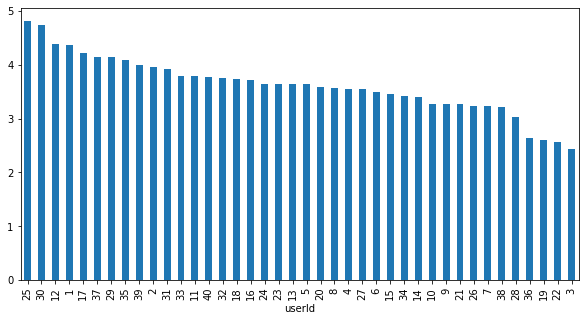

In [545]:
ratings_by_user['rating']['mean'].head(40).sort_values(ascending=False).plot(kind='bar',figsize=(10,5))

#### Graph for movies with rating more than 100

<AxesSubplot:xlabel='userId'>

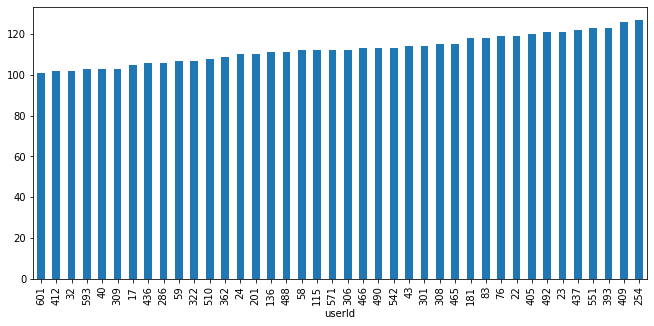

In [546]:
ratings_by_user[ratings_by_user['rating']['size']>100]['rating']['size'].sort_values(ascending=True).head(40).plot(kind='bar',figsize=(11,5))

#### Movies with low ratings

In [547]:
# ratings_by_user= ratings_by_user.drop('timestamp',axis=1)
ratings_by_movies= merged.groupby('movieId').agg([np.size, np.mean])
ratings_by_movies= ratings_by_movies.drop('userId',axis=1)
ratings_by_movies= ratings_by_movies.drop('timestamp',axis=1)
ratings_by_movies.head(5)

rating          
          size      mean
movieId                 
1          215  3.920930
2          110  3.431818
3           52  3.259615
4            7  2.357143
5           49  3.071429

In [548]:
low_rated_filter= ratings_by_movies['rating']['mean']<2

In [549]:
low_rated= ratings_by_movies[low_rated_filter]

In [550]:
low_rated.head(5)

rating     
          size mean
movieId            
71           5  1.7
152          2  1.5
178          1  1.0
179          2  1.5
278          2  1.5

<AxesSubplot:xlabel='movieId'>

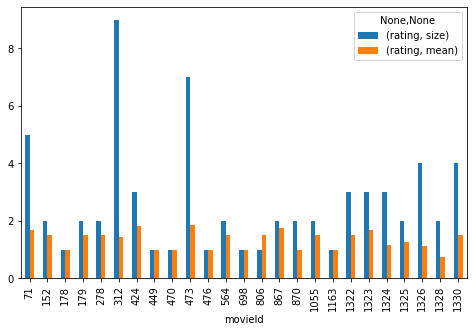

In [551]:
low_rated.head(25).plot(kind='bar',figsize=(8,5))

#### Movies with highest & lowest ratings

In [552]:
merged.head(5)
# .sort_values(ascending=True)
# ratings_by_user.head(5).sort_values(ascending=False)

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [553]:
temp= merged.groupby('movieId').agg([np.mean])
# temp= temp.drop('title',axis=1)
# temp= temp.drop('genres',axis=1)
temp= temp.drop('userId',axis=1)
temp= temp.drop('timestamp',axis=1)
# temp.head(5).sort_index(ascending=False)
# temp.head(5).sort_values(by='rating')
# temp=temp.sort_values(by='[rating][size]')
temp.head(5)

,rating
,mean
movieId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [554]:
temp['rating']['mean'].sort_values(ascending=True).head(100)

movieId
26696     0.50
3604      0.50
7312      0.50
145724    0.50
76030     0.50
          ... 
26095     0.50
59306     0.75
1328      0.75
4125      0.75
55292     0.75
Name: mean, Length: 100, dtype: float64

In [555]:
temp['rating']['mean'].sort_values(ascending=False).head(100)

movieId
88448     5.0
100556    5.0
143031    5.0
143511    5.0
143559    5.0
         ... 
44943     5.0
1759      5.0
47736     5.0
112512    5.0
124404    5.0
Name: mean, Length: 100, dtype: float64

### Movies and Tags

In [556]:
merged2= pd.merge(movies,tags,on='movieId',how='inner')
merged2.head(5)

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013
3,2,Jumanji (1995),Adventure|Children|Fantasy,62,fantasy,1528843929
4,2,Jumanji (1995),Adventure|Children|Fantasy,62,magic board game,1528843932


In [557]:
merged2_with_id_1= merged2[merged2.movieId==1]
merged2_with_id_1.head(10)
# prints entries with movie id=1

,movieId,title,genres,userId,tag,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336,pixar,1139045764
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474,pixar,1137206825
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567,fun,1525286013


In [558]:
temp= merged2.groupby('tag').agg([np.size])
temp= temp.drop('userId',axis=1)
temp= temp.drop('timestamp',axis=1)
temp= temp.drop('title',axis=1)
temp= temp.drop('genres',axis=1)
temp.head(5)

,movieId
,size
tag,
"""artsy""",1
06 Oscar Nominated Best Movie - Animation,3
1900s,1
1920s,2
1950s,2


#### 10 Least and Most frequently used tags

In [559]:
temp['movieId']['size'].sort_values(ascending=True).head(10)

tag
"artsy"              1
falling              1
fairy tale           1
faerie tale          1
exciting             1
ex-con               1
evolution            1
families             1
ethics               1
entirely dialogue    1
Name: size, dtype: int64

In [560]:
temp['movieId']['size'].sort_values(ascending=False).head(10)

tag
In Netflix queue     131
atmospheric           36
thought-provoking     24
superhero             24
Disney                23
surreal               23
funny                 23
religion              22
dark comedy           21
sci-fi                21
Name: size, dtype: int64

#### Graph of most frequently used tags vs their frequency

<AxesSubplot:xlabel='tag'>

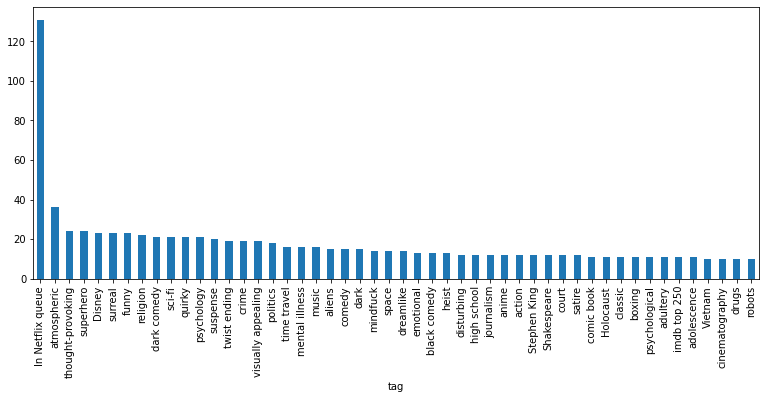

In [561]:
temp['movieId']['size'].sort_values(ascending=False).head(50).plot(kind='bar',figsize=(13,5))